Preparation for postgresql:

```
$ initdb pg -E utf8
$ postgres -D pg
$ createdb avito2
$ pgsql avito2 < import.sql
```

Here is the import query:

```
CREATE TABLE location(locationID int, regionID int);
CREATE TABLE ItemPairs_train(itemID_1 int, itemID_2 int, isDuplicate int, generationMethod int);
CREATE TABLE ItemPairs_test(id int, itemID_1 int, itemID_2 int);

COPY location(locationID,regionID) FROM '/mnt/avito_dup/input/Location.csv' CSV HEADER;
COPY ItemPairs_train(itemID_1, itemID_2, isDuplicate, generationMethod) FROM '/mnt/avito_dup/input/ItemPairs_train.csv' CSV HEADER;
COPY ItemPairs_test(id, itemID_1, itemID_2) FROM '/mnt/avito_dup/input/ItemPairs_test.csv' CSV HEADER;
```

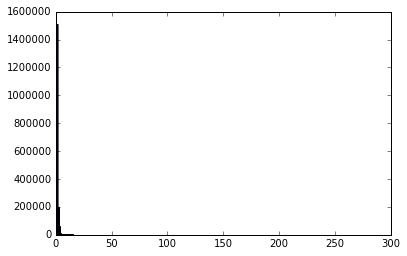

In [8]:
%matplotlib inline

import psycopg2 as pg
import pandas as pd
import matplotlib.pyplot as plt


with pg.connect(database='avito2') as conn:
    sql = 'SELECT itemid_2, count(1) AS freq FROM itempairs_train GROUP BY itemid_2 ORDER BY freq DESC'
    df = pd.read_sql(sql, conn)

_ = plt.hist(df.freq, bins=df.freq.max())